In [2]:
#imports
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

In [3]:

def distillation_model_lin(R, parameters):
    F = parameters['F']
    xF = parameters['xF']
    xD = parameters['xD']
    alpha = parameters['alpha']
    N = parameters['N']
    Rm = parameters['Rm']
    Nm = N - .75*(1 - ( (R - Rm) / (R + 1) )**.5668 ) * (N + 1)
    xB = 1 / (1 + (1 - xD) / xD * np.exp(Nm*np.log(alpha)))
    B = F * (xF - xD) / (xB - xD)
    D = F - B
    L = R*D
    V = L + D
    res = np.array([V, L, D, xB, Nm, B, Rm])
    return res



In [4]:
def objective(R, parameters):
    if type(R) == np.ndarray: # This is here to prevent R from being an array,␣which is a risk when minimize() inserts values of x
        R = R[0]
    c1 = 3/1e6 # $/BTU
    c2 = 0/1e6 # $/BTU
    W = .11 # $/lb
    U = -.08 # $/lb
    lam = 130 # btu/lb
    xD = .95
    y = distillation_model_lin(R, parameters)
    V, L, D, xB, Nm, B, Rm = y
    Q = (c1 + c2)*lam*V + W*xB*B + U*(1 - xD)*D
    return Q

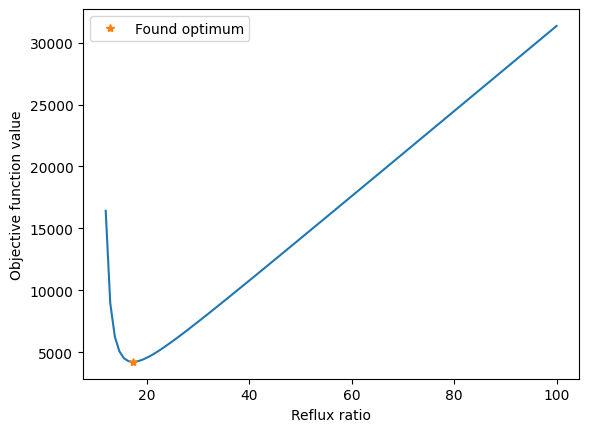

In [6]:
parameters = {}
parameters['F'] = 1.2e6 # lb/day
parameters['xF'] = .7
parameters['xD'] = .95
parameters['alpha'] = 1.105
parameters['N'] = 94
parameters['Rm'] = 1/(parameters['alpha'] - 1) * (parameters['xD']/parameters['xF'] - parameters['alpha'] * (1 - parameters['xD']) / (1 -parameters['xF']))
R_array = np.linspace(12, 100, 100)
Q_array = np.zeros(R_array.shape)
for i, R in enumerate(R_array):
    Q_array[i] = objective(R, parameters)
res = minimize(lambda R: objective(R, parameters),x0 = 10,
            method = None,
            options = {'disp': True},
            bounds = ((parameters['Rm'], np.inf),) # The comma here isimportant: otherwise, minimize() doesn't recognize this as a sequence of␣2-tuples!
            )
R_opt = res.x[0]
Q_opt = objective(R_opt, parameters)
fig, ax = plt.subplots()
ax.plot(R_array, Q_array)
ax.plot(R_opt, Q_opt, marker = '*', ls = '', label = 'Found optimum')
ax.set_xlabel('Reflux ratio')
ax.set_ylabel('Objective function value')
ax.legend()